# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip3 install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Please add your own API key in api_keys.py ## 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create lists to hold information in for loop

city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Run for loop to retrieve information from cities 
print("Beginning Data Retrieval      ")
print("-------------------------------")
for i, city in enumerate(cities):
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    try:
        response = requests.get(f"{query_url}{city}").json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Loading city: {i} | {city}")
    except:
        print("City not found...Skipping")
    pass
print("-------------------------------")
print("Data Retrieval Completed       ")
print("-------------------------------")


Beginning Data Retrieval      
-------------------------------
Loading city: 0 | nikolskoye
Loading city: 1 | vaini
Loading city: 2 | nizwa
Loading city: 3 | bathsheba
Loading city: 4 | upernavik
Loading city: 5 | atuona
Loading city: 6 | ushuaia
Loading city: 7 | flinders
Loading city: 8 | ouadda
City not found...Skipping
Loading city: 10 | banjar
Loading city: 11 | rikitea
Loading city: 12 | carnarvon
Loading city: 13 | tuktoyaktuk
Loading city: 14 | new norfolk
Loading city: 15 | saskylakh
Loading city: 16 | yangjiang
Loading city: 17 | altay
Loading city: 18 | vestmannaeyjar
Loading city: 19 | hilo
Loading city: 20 | punta arenas
Loading city: 21 | cienfuegos
Loading city: 22 | naze
Loading city: 23 | vardo
Loading city: 24 | dikson
Loading city: 25 | hasaki
Loading city: 26 | yellowknife
Loading city: 27 | severo-kurilsk
Loading city: 28 | richards bay
Loading city: 29 | srednekolymsk
Loading city: 30 | constancia
City not found...Skipping
City not found...Skipping
Loading city: 3

Loading city: 285 | nagorsk
City not found...Skipping
Loading city: 287 | uvira
City not found...Skipping
Loading city: 289 | kaeo
Loading city: 290 | tapes
Loading city: 291 | dabat
City not found...Skipping
Loading city: 293 | aykhal
Loading city: 294 | pangnirtung
Loading city: 295 | san vicente de canete
Loading city: 296 | gadag
Loading city: 297 | half moon bay
Loading city: 298 | ust-nera
Loading city: 299 | nanortalik
Loading city: 300 | pueblo bello
Loading city: 301 | brownwood
Loading city: 302 | nantucket
Loading city: 303 | huaraz
Loading city: 304 | mocuba
Loading city: 305 | laguna
Loading city: 306 | norman wells
Loading city: 307 | tuatapere
Loading city: 308 | canon city
Loading city: 309 | mayo
Loading city: 310 | cabo san lucas
Loading city: 311 | nelson bay
Loading city: 312 | husavik
Loading city: 313 | tautira
Loading city: 314 | umm lajj
Loading city: 315 | kiama
Loading city: 316 | mahibadhoo
Loading city: 317 | kabompo
Loading city: 318 | yatou
Loading city: 3

Loading city: 569 | lazaro cardenas
Loading city: 570 | emba
Loading city: 571 | tiszasuly
Loading city: 572 | karratha
Loading city: 573 | elsterwerda
Loading city: 574 | teya
Loading city: 575 | itarema
Loading city: 576 | calvinia
Loading city: 577 | chitipa
Loading city: 578 | geraldton
Loading city: 579 | desert hot springs
Loading city: 580 | rongcheng
Loading city: 581 | aden
Loading city: 582 | madimba
Loading city: 583 | kamiiso
Loading city: 584 | port blair
Loading city: 585 | kahului
Loading city: 586 | kilembe
Loading city: 587 | tursunzoda
Loading city: 588 | ucluelet
Loading city: 589 | pullman
Loading city: 590 | mahajanga
Loading city: 591 | prince rupert
Loading city: 592 | labis
Loading city: 593 | sumenep
Loading city: 594 | kamaishi
Loading city: 595 | ambulu
Loading city: 596 | miyoshi
Loading city: 597 | nichinan
Loading city: 598 | lerwick
Loading city: 599 | chardara
Loading city: 600 | binzhou
Loading city: 601 | salinas
Loading city: 602 | camacupa
Loading ci

In [4]:
weather_df = pd.DataFrame({"City": city_name,
                     "Latitude": lat,
                     "Longitude": lon,
                     "Max Temp": max_temp,
                     "Humidity": humidity,
                     "Cloudiness": cloudiness,
                     "Wind Speed": wind_speed,
                     "Country": country,
                     "Date": date
                    })

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_csv = weather_df.to_csv("./weather_csv")

In [ ]:
weather_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Testing


/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


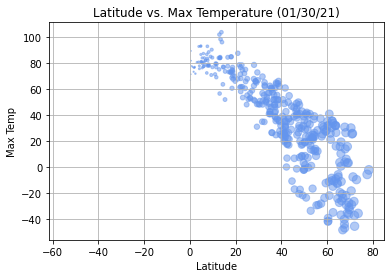

In [32]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", s=x_axis, alpha=0.5)

plt.title("Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)
plt.savefig("./Plots/LatitudeTemperatureScatter.png")

# As latitude increases, max temperature decreases. There may be an inverse correlation between latitude and max temp. 

## Latitude vs. Humidity Plot

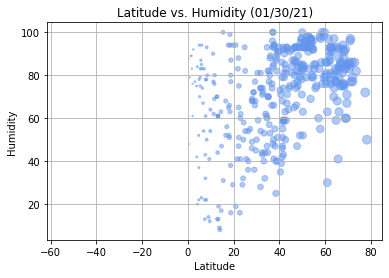

In [12]:
x_axis1 = weather_df["Latitude"]
y_axis1 = weather_df["Humidity"]

plt.scatter(x_axis1, y_axis1, marker="o", facecolors="cornflowerblue", s=x_axis, alpha=0.5)

plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("./Plots/LatitudeHumidityScatter.png")
# As latitude increases, humidity percentage increases. There may be a positive correlation between latitude 
# and humidity since most of the data points are increasing and clustered around high latitude points and humidity


## Latitude vs. Cloudiness Plot

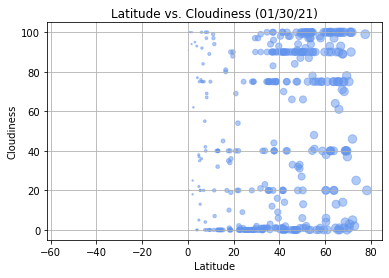

In [16]:
x_axis2 = weather_df["Latitude"]
y_axis2 = weather_df["Cloudiness"]

plt.scatter(x_axis2, y_axis2, marker="o", facecolors="cornflowerblue", s=x_axis, alpha=0.5)

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("./Plots/LatitudeCloudinessScatter.png")

# There are clusters of data points around high latitude and high/low cloudiness so there is not enough information
# to conclude that there is a correlation between latitude and cloudiness. There may be other factors for cloudiness
# levels such as aptitude but that is not presented here as we are comparing cloudiness with latitude. 

## Latitude vs. Wind Speed Plot

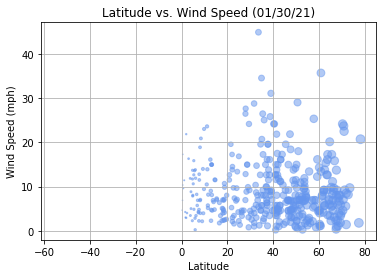

In [33]:
x_axis2 = weather_df["Latitude"]
y_axis2 = weather_df["Wind Speed"]

plt.scatter(x_axis2, y_axis2, marker="o", facecolors="cornflowerblue", s=x_axis, alpha=0.5)

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("./Plots/LatitudeWindSpeedScatter.png")

# The data shows that cities generally have low wind speeds (under 25 mph). There is a cluster of data 
# points around high latitude and low wind speeds but there does not seem to be any correlation 

## Linear Regression

In [19]:
northern_hemi = weather_df[weather_df["Latitude"] >= 0]
southern_hemi = weather_df[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

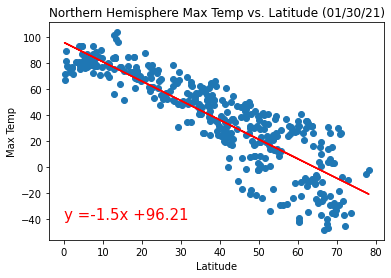

In [23]:
x_north_lat = northern_hemi["Latitude"]
y_north_max_temp = northern_hemi["Max Temp"]
plt.scatter(x_north_lat, y_north_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_max_temp)
regress_values = x_north_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_north_lat, regress_values, "r-")
plt.annotate(line_eq, (0, -40), fontsize=15, color="red")
plt.title("Northern Hemisphere Max Temp vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("./Plots/NorthernLatitudeMaxTempRegression.png")

# There is a high negative correlation between northern hemisphere latitude and max temperature. As latitude increases
# the max temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

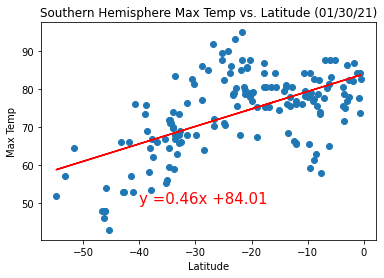

In [34]:
x_south_lat = southern_hemi["Latitude"]
y_south_max_temp = southern_hemi["Max Temp"]
plt.scatter(x_south_lat, y_south_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_max_temp)
regress_values = x_south_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_south_lat, regress_values, "r-")
plt.annotate(line_eq, (-40, 50), fontsize=15, color="red")
plt.title("Southern Hemisphere Max Temp vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("./Plots/SouthernLatitudeMaxTempRegression.png")

# There is a weak positive correlation between southern hemisphere latitude and max temp. As latitude increases,
# max temperature seems to increase as well. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

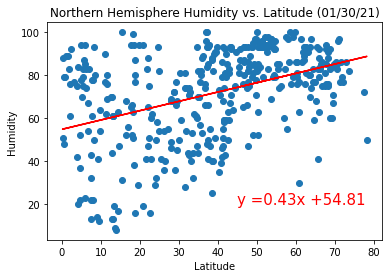

In [26]:
y_north_humidity = northern_hemi["Humidity"]
plt.scatter(x_north_lat, y_north_humidity)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_humidity)
regress_values = x_north_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_north_lat, regress_values, "r-")
plt.annotate(line_eq, (45, 20), fontsize=15, color="red")
plt.title("Northern Hemisphere Humidity vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("./Plots/NorthernLatitudeHumidityRegression.png")

# There is a weak positive correlation between humidity and northern hemisphere latitude. There are many 
# different humidity levels for the latitude points. 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

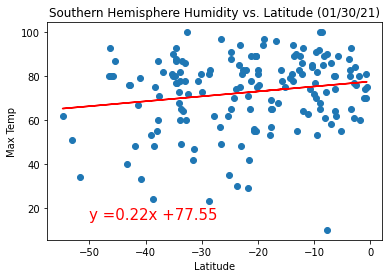

In [27]:
x_south_lat = southern_hemi["Latitude"]
y_south_humidity_temp = southern_hemi["Humidity"]
plt.scatter(x_south_lat, y_south_humidity_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_humidity_temp)
regress_values = x_south_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_south_lat, regress_values, "r-")
plt.annotate(line_eq, (-50, 15), fontsize=15, color="red")
plt.title("Southern Hemisphere Humidity vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("./Plots/SouthernLatitudeHumidityRegression.png")

# There is a weak positive correlation between humidity and southern hemisphere latitude. There are many 
# different humidity levels for the latitude points. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

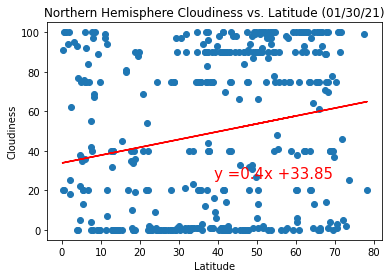

In [28]:
y_north_cloudiness = northern_hemi["Cloudiness"]
plt.scatter(x_north_lat, y_north_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_cloudiness)
regress_values = x_north_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_north_lat, regress_values, "r-")
plt.annotate(line_eq, (39, 26), fontsize=15, color="red")
plt.title("Northern Hemisphere Cloudiness vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("./Plots/NorthernLatitudeCloudinessRegression.png")

# The data points are very dispursed and have high variance from the regression line so there is not a high 
# correlation between cloudiness and northern hemisphere latitude. There may be aspects that latitude does not 
# capture such as the aptitude of the city which is a factor for cloudiness levels. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

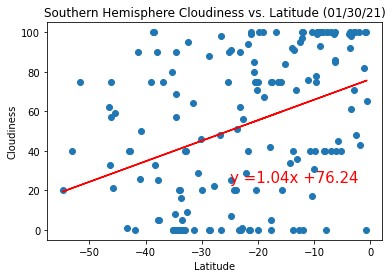

In [29]:
x_south_lat = southern_hemi["Latitude"]
y_south_cloudiness = southern_hemi["Cloudiness"]
plt.scatter(x_south_lat, y_south_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_cloudiness)
regress_values = x_south_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_south_lat, regress_values, "r-")
plt.annotate(line_eq, (-25, 24), fontsize=15, color="red")
plt.title("Southern Hemisphere Cloudiness vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("./Plots/SouthernLatitudeCloudinessRegression.png")

# The data points are very dispursed for cloudiness and southern hemisphere latitude but there seem to be a positive
# correlation between the two. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

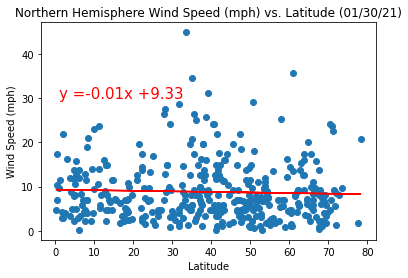

In [30]:
y_north_wind_speed = northern_hemi["Wind Speed"]
plt.scatter(x_north_lat, y_north_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_wind_speed)
regress_values = x_north_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_north_lat, regress_values, "r-")
plt.annotate(line_eq, (1, 30), fontsize=15, color="red")
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("./Plots/NorthernLatitudeWindSpeedRegression.png")

# There is low correlation between wind speed and northern hemisphere latitude but most cities start with low levels
# of wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

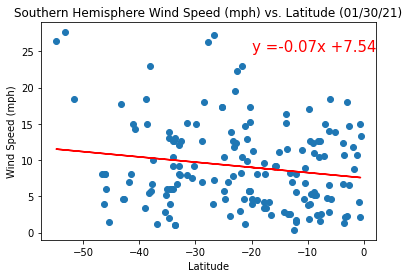

In [31]:
x_south_lat = southern_hemi["Latitude"]
y_south_wind_speed = southern_hemi["Wind Speed"]
plt.scatter(x_south_lat, y_south_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_wind_speed)
regress_values = x_south_lat * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_south_lat, regress_values, "r-")
plt.annotate(line_eq, (-20, 25), fontsize=15, color="red")
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("./Plots/SouthernLatitudeWindSpeedRegression.png")

# There is low correlation between wind speed and southern hemisphere latitude but most cities start with low levels
# of wind speed. 